In [1]:
# import relevant libraries to import and visualize data
import os
import pandas as pd
import matplotlib.pyplot as plt

# Data Reading

In [2]:
# read the relevant datasets

#file_path = '~/Google Drive/NLP/'
file_path = 'C:/Users/Eduardo/Desktop/IE 3/NATURAL LANGUAGE PROCESSING & TEXT MINING/First Assignment/'

news_training = pd.read_csv(os.path.join(file_path,'fake_or_real_news_training.csv'),encoding='utf-8') # read the training data into a data frame
news_test = pd.read_csv(os.path.join(file_path,'fake_or_real_news_test.csv'),encoding='utf-8') # read the dev data into a data frame

In [3]:
news_test = pd.read_csv(os.path.join(file_path,'fake_or_real_news_test.csv'),encoding='utf-8') # read the dev data into a data frame

In [4]:
news_test.head()

ID                                              title  \
0  10498  September New Homes Sales Rise——-Back To 1992 ...   
1   2439  Why The Obamacare Doomsday Cult Can't Admit It...   
2    864  Sanders, Cruz resist pressure after NY losses,...   
3   4128  Surviving escaped prisoner likely fatigued and...   
4    662  Clinton and Sanders neck and neck in Californi...   

                                                text  
0  September New Homes Sales Rise Back To 1992 Le...  
1  But when Congress debated and passed the Patie...  
2  The Bernie Sanders and Ted Cruz campaigns vowe...  
3  Police searching for the second of two escaped...  
4  No matter who wins California's 475 delegates ...

In [5]:
news_training.head()

ID                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label   X1   X2  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  NaN  NaN  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  NaN  NaN  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  NaN  NaN  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  NaN  NaN  
4  It's primary day in New York and front-runners...  REAL  NaN  NaN

# Data Exploration

The following exploratory steps were carried out on the given dataset:

- We checked to see if there were any duplicated rows and found that they were rows with the same text but different titles. 
- We checked to see if there was an imbalance in the labels and concluded that some text that has been correctly imputed. 
- We  checked to see if there were languages other than english represented in the text. In order to do so, we downloaded the list of Spanish stopwords from nltk and checked one of them against (something with an accent, which checks for both the accent and the word) the text. The output contains the given string and sentences in Spanish, which means there are other languages represented in the text that need accounting for.
- Lastly, we checked what the columns X1 and X2 contained, in order to delete them if they only contain NaNs. We found that a) There are 17 and 14 rows that have the values REAL and FAKE respectively in column X1. In these cases, the real text appears in column label and in the column text, there appears to be somekind of a subtitle and b) In 2 rows we have values REAL and FAKE in the column X2, and different kind of text in title, text and label columns.

In [6]:
news_training[news_training.duplicated('text')].sort_values('text')

ID                                              title  \
1941   7525  Putins Army is coming for World war 3 against ...   
3642   9070  Round Up the Unusual Suspects: Moneyball Nerds...   
1664   5802  Alert News : Putins Army Is Coming For World W...   
3641   7048  Comment software has been rolled back to old v...   
806    9314  Southern Poverty Law Center Targets Anti-Jihad...   
1736   9564  An LDS Reader Takes A Look At Trump Accuser Je...   
710    8332  MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...   
919   10304  Refugee Resettlement Watch: Swept Away In Nort...   
1851   5752  America’s Senator Jeff Sessions Warns of Worse...   
3350   5427  Thomas Frank Explores Whether Hillary Clinton ...   
3073   5367  NATIONAL REVIEW, Conservatism Inc., Plan To Ca...   
2244   6714  Is your promising internet career over now Vin...   
2426   5776  Radio Derb Transcript For October 21 Up: The M...   
2576   8055  A Reader Refers Us To Englishman Pat Condell O...   
3511   8240  Democrats Playing Class Card To Split the Whit...   
2662  10193  “Donald Trump And The Rise Of White Identity I...   
2788   5715          Hope for the best, prepare for the worst…   
2832   6733  The Comey Confrontation: In Our New Third-Worl...   
1883   8816  Paris Migrant Campers Increase after Calais Is...   
940    9474  Michael Bloomberg Names Technological Unemploy...   
1780    906  Delegates face death threats from Trump suppor...   
1631    698          Shady accounting underpins Trump’s wealth   
1325    899   Sanders: Democratic Party hasn't been fair to me   
3349    771                  Hillary Clinton's 'Delegate Hell'   
3730   7843  BREAKING: Obama Says There Were No Scandals Du...   
2253   6206        Are We on the Eve of Total Life Extinction?   
3488   2048                  Wall St. Republicans' dark secret   
2884     18  How Planned Parenthood could shut down the gov...   
2819   1963  Foster Friess chides Rand Paul in not-so-priva...   
2714   2000          President Paul? Wall Street on high alert   
...     ...                                                ...   
917     736        Who's winning Indiana? It's anybody's guess   
2605    815                         How Bernie changed Hillary   
1455    700  Can Libertarian nominees Gary Johnson and Bill...   
2023    628  Trump's terror response has Republicans fretti...   
627     605  Senate GOP leaving tea party primary battles b...   
957     602        The GOP's big-money plan to save the Senate   
2066    606  Kentucky election could blot an Obamacare brig...   
1025   2877     White House, Dems seek to water down Iran bill   
1934   2825             Does Kerry want an Iran deal too much?   
1916   1817                                     Jill's dilemma   
3066    572          History class becomes a debate on America   
3843    571                             Sabotaging Common Core   
3885   2612                    Netanyahu rival concedes defeat   
922    2627              'There appear to be no rules anymore'   
2916   2626                Hope and change, the Hebrew edition   
1492   2697  University of Missouri, please immediately fir...   
3309    222                House approves Syrian refugees bill   
1668    224     Ryan flexes muscles in Ways and Means showdown   
3476    307                              Boehner takes revenge   
1342   8196  Voter Dreading Being Sent Over To Visibly Stup...   
1332   2680                       Drudge goes all in for Trump   
1954   4544  Loretta Lynch becomes first African-American w...   
3301   1762                      OnPolitics | 's politics blog   
3162   6919  Hamas Member Admits On Live TV That ‘Palestine...   
3050   6647  WORLD WAR 3 is Now * HILLARY Clinton Is Mushro...   
1932   9799  WORLD WAR 3 Hillary Clinton Foundation Holocau...   
2114   7046  BUILD UP WW3 World War 3 Is Coming Current Sit...   
2336   4396  Obamacare Enrollees Anxiously Await Supreme Co...   
1811    413  U.S. officials optimistic they will 

In [7]:
plt.bar(height=news_training['label'].count(),x=news_training['label'].unique())

<BarContainer object of 35 artists>

In [8]:
# download the stopwords library

from nltk.corpus import stopwords

In [9]:
# check the list of possible stopwords

list(stopwords.words('spanish'))[50:60]

['contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes']

In [10]:
# check to see if the output after trying to find the string has the stopword in it. 

news_training.loc[(news_training['text'].str.find('mí') != -1),'text'][2685]

"Here's something interesting from The Unz Review... Recipient Name Recipient Email => \nDear Mexican: ¿ Por que no hay un pinche líder entre nosotros o de nosotros los mexicanos? Para que tuviera los tanates bien puestos y hablara frente al congreso y les dijera sus verdades a los hipócritas políticos. ¿Será que “nuestros lideres” son unos miedosos o vendidos? No hay uno solo (solo el Chapulín Colorado) que nos defienda, tanta humillación que han tenido los negros, siempre de sirvientes o mozos, pandilleros y drogadictos (en Hollywood) y nadie protesta y salen con que Memín Penguin es ofensivo, otra de esas y nos subimos el cierre, ¿eh? En serio , “Ask a Mexican” , ¿Como podría yo hablar delante del congreso, local, estatal o federal? ¿Sería mucho pedir? \nPónganse las Pilas, Putos \nDear Readers: For those of you who still don’t habla —and if you don’t habla , ¿ que chingado estas esperando ?— the writer asked where’s the Mexican leader who’ll take us into the Promised Land of Americ

In 17 rows we have value REAL in column X1 and in 14 rows value FAKE. In those cases, the real text appears in column label and in column text in appears somekind of subtitle
- 2) In

In [11]:
# X1 column has some text and labels 

news_training['X1'].unique()

array([nan, 'REAL', 'FAKE',
       'PLANNED PARENTHOOD’S LOBBYING GETS AGGRESSIVE.\xa0Congress may have spent August away from Washington but Planned Parenthood’s campaign to convince lawmakers to protect the group’s funding followed them back to their home states. Power Post has more.\n\n“Lawmakers will raise the stakes when Congress returns next week by threatening to defund the group through the federal appropriations process. Planned Parenthood’s counter-offensive is widespread and varied and is unfolding inside and outside the Beltway. The group has been\xa0organizing rallies, flooding lawmakers’ town hall meetings, commissioning polls, shelling\xa0out six figures for television\xa0ads and\xa0hiring forensics experts to try to discredit undercover video footage that sparked the controversy. The success of these lobbying efforts will be tested when Congress returns and must move a short-term spending bill to keep the government open. Some conservatives in both chambers are pushing 

In [12]:
# X2 column has some misclassified labels

news_training['X2'].unique()

array([nan, 'REAL', 'FAKE'], dtype=object)

# Data Cleaning

The following steps were taken to clean the data:

- The first step was to put the text and labels into their correct columns. We have put the REAL and FAKE values in its correct column label, the text in column text.
- The second step was to remove any duplicated data from the text and title columns, without removing any of the blanks. 
- The last step was add the title column to the text column as we suspected that the title might have relevant information that might help us "upweight" the given corpus.

In [13]:
# switch text to their relevant columns

news_training['text'][(news_training['X1'] == 'REAL') | (news_training['X1'] == 'FAKE')] = news_training['label']
news_training['label'][(news_training['X1'] == 'REAL') | (news_training['X1'] == 'FAKE')] = news_training['X1']

C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
# unique label values check

news_training.X1.unique()

array([nan, 'REAL', 'FAKE',
       'PLANNED PARENTHOOD’S LOBBYING GETS AGGRESSIVE.\xa0Congress may have spent August away from Washington but Planned Parenthood’s campaign to convince lawmakers to protect the group’s funding followed them back to their home states. Power Post has more.\n\n“Lawmakers will raise the stakes when Congress returns next week by threatening to defund the group through the federal appropriations process. Planned Parenthood’s counter-offensive is widespread and varied and is unfolding inside and outside the Beltway. The group has been\xa0organizing rallies, flooding lawmakers’ town hall meetings, commissioning polls, shelling\xa0out six figures for television\xa0ads and\xa0hiring forensics experts to try to discredit undercover video footage that sparked the controversy. The success of these lobbying efforts will be tested when Congress returns and must move a short-term spending bill to keep the government open. Some conservatives in both chambers are pushing 

For rows with scenario 2, we have deleted them

In [15]:
# switch text to their relevant columns

news_training = news_training[news_training['X2'] != 'REAL']
news_training = news_training[news_training['X2']!= 'FAKE']

In [16]:
# check for unique values

news_training.X2.unique()

array([nan], dtype=object)

<BarContainer object of 2 artists>

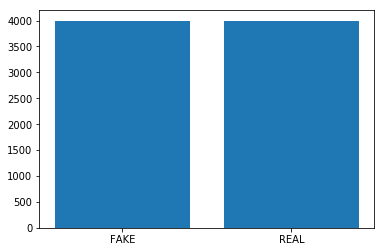

In [17]:
# final check to see that the label column is now correctly filled

plt.bar(height=news_training['label'].count(),x=news_training['label'].unique())

In [18]:
# Drop duplicates that are not blanks. 

news_training = news_training[news_training['text'] != ' '].drop_duplicates('text')
news_training = news_training[news_training['title'] != ' '].drop_duplicates('title')

In [19]:
# check that duplicates have been deleted

news_training[news_training['text'] != ' '].duplicated('text').sum()

0

In [20]:
# check that duplicates have been deleted

news_training[news_training['title'] != ' '].duplicated('title').sum()

0

In [21]:
# add the title sentence to the corpus

news_training['text'] = news_training['title'] + '. ' + news_training['text']


In [22]:
# check to see if that has been done correctly

news_training['text'][0]

'You Can Smell Hillary’s Fear. Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership 

# Data Merging

We also decided to merge the dataset so that all the pre-processing steps could be run on both datasets. Before doing so:

- The title columns were deleted from both datasets, since title has already been combined into the text column.
- The labels for the test set were changed to 0 before merging to facilitate the predictions.

In [23]:
# drop the title column from both datasets

news_training = news_training.drop('title',axis=1)

In [24]:
# put test label as 0

news_test['label'] = 0

In [25]:
# concat the test and train sets 

dataset = pd.concat([news_training,news_test],axis=0,sort=False)

In [26]:
dataset.head(50)

ID                                               text label   X1   X2  \
0    8476  You Can Smell Hillary’s Fear. Daniel Greenfiel...  FAKE  NaN  NaN   
1   10294  Watch The Exact Moment Paul Ryan Committed Pol...  FAKE  NaN  NaN   
2    3608  Kerry to go to Paris in gesture of sympathy. U...  REAL  NaN  NaN   
3   10142  Bernie supporters on Twitter erupt in anger ag...  FAKE  NaN  NaN   
4     875  The Battle of New York: Why This Primary Matte...  REAL  NaN  NaN   
5    6903  Tehran, USA.   \nI’m not an immigrant, but my ...  FAKE  NaN  NaN   
6    7341  Girl Horrified At What She Watches Boyfriend D...  FAKE  NaN  NaN   
7      95  ‘Britain’s Schindler’ Dies at 106. A Czech sto...  REAL  NaN  NaN   
8    4869  Fact check: Trump and Clinton at the 'commande...  REAL  NaN  NaN   
9    2909  Iran reportedly makes new push for uranium con...  REAL  NaN  NaN   
10   1357  With all three Clintons in Iowa, a glimpse at ...  REAL  NaN  NaN   
11    988  Donald Trump’s Shockingly Weak Delegate Game S...  REAL  NaN  NaN   
12   7041  Strong Solar Storm, Tech Risks Today | S0 News...  FAKE  NaN  NaN   
13   7623  10 Ways America Is Preparing for World War 3. ...  FAKE  NaN  NaN   
14   1571  Trump takes on Cruz, but lightly. Killing Obam...  REAL  NaN  NaN   
15   4739  How women lead differently. As more women move...  REAL  NaN  NaN   
16   7737  Shocking! Michele Obama & Hillary Caught Glamo...  FAKE  NaN  NaN   
17   8716  Hillary Clinton in HUGE Trouble After America ...  FAKE  NaN  NaN   
18   3304  What's in that Iran bill that Obama doesn't li...  REAL  NaN  NaN   
19   3078  The 1 chart that explains everything you need ...  REAL  NaN  NaN   
20   2517  The slippery slope to Trump’s proposed ban on ...  REAL  NaN  NaN   
21  10348  Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...  FAKE  NaN  NaN   
22    778  Hillary Clinton Makes A Bipartisan Appeal on S...  REAL  NaN  NaN   
23   3300  New Senate majority leader’s main goal for GOP...  REAL  NaN  NaN   
24   6155  ‘Inferno’ and the Overpopulation Myth. Mises.o...  FAKE  NaN  NaN   
25    636  Anti-Trump forces seek last-ditch delegate rev...  REAL  NaN  NaN   
26    755  Sanders Trounces Clinton in W. Va. -- But Will...  REAL  NaN  NaN   
27    626  Donald Trump Is Changing His Campaign Slogan t...  REAL  NaN  NaN   
28    691  Pure chaos: Donald Trump’s campaign management...  REAL  NaN  NaN   
29   5743  Syrian War Report – November 1, 2016: Syrian M...  FAKE  NaN  NaN   
30   1787  GOP insiders: Carly crushed it. On this day in...  REAL  NaN  NaN   
31   7808  Jeffrey Sewell et al. : Metabiology face to fa...  FAKE  NaN  NaN   
32   6484  Why It’s Necessary To Relax Into A Stretch. In...  FAKE  NaN  NaN   
33   7385  Brexit Encourages UK to Trade With Non-EU Stat...  FAKE  NaN  NaN   
34   9016  2016 interview with Socrates: Another day of L...  FAKE  NaN  NaN   
35   9324  Mike Pence Drapes Shawl Over Immodest Lady Jus...  FAKE  NaN  NaN   
36   8983  First Ever Hindu Woman Elected into Congress. ...  FAKE  NaN  NaN   
37   8965  Donald Groped Hillary in 2005! Trump and Weine...  FAKE  NaN  NaN   
38   5580  Ex-Assistant FBI Director: Clintons Are a Crim...  FAKE  NaN  NaN   
39   9757  Hillary Wants Aggressively Interventionist For...  FAKE  NaN  NaN   
40   1967  Both parties want to craft populist messages f...  REAL  NaN  NaN   
41    431  First Take: Wall Street bids goodbye to June h...  REAL  NaN  NaN   
42   5955  Real Disclosure! Secret Alien Base Found In Mo...  FAKE  NaN  NaN   
43   7455  Homeless Woman Protects Trump’s Walk of Fame S...  FAKE  NaN  NaN   
44   5224  With 3:20 a.m. tweet storm Saturday, Clinton c...  REAL  NaN  NaN   
45   7793  220 ‘Significant’ Pipeline Spills Already This...  FAKE  NaN  NaN   
46   2777  Obama makes the right call to tough it out in ...  REAL  NaN  NaN   
47    587  Senate race rankings: Dems attack as GOP lays ...  REAL  NaN  NaN   
48   9403  ‘He didn’t know the boy didn’t want to be rape...  FAKE  NaN  NaN   
49   59

In [27]:
print(dataset['text'][1])

1    Watch The Exact Moment Paul Ryan Committed Pol...
1    But when Congress debated and passed the Patie...
Name: text, dtype: object


# Preprocessing

### Bag-of-Words

We decided to start the preprocessing by creating a 'bag-of-words' by vectorizing each sentence and counting the frequency. In order to do so, 
- The relevant sklearn library was downloaded and fit to the dataset. 
- Since the corpus is related to news, we hypothesised that the features that will help us detect fake-news would be keywords (like 'Hillary's Fear') rather than stopwords. Thus, the stopwords were revomed during the vectorization process. Since we had also found that there were langauges other than english in the text, we decided to remove stopwords in multiple langauges.
- Lastly, looking at the text, we suspect the corpus to contain a lot of bigrams (full names of politicians, cities etc.), which is why we also decided to use an ngram range of 2 during the vectorization process.

In [28]:
# import relevant libraries

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [29]:
stop_words_en = list(stopwords.words('english'))
stop_words_fr = list(stopwords.words('french'))
stop_words_es = list(stopwords.words('spanish'))

In [30]:
stop_words = stop_words_en + stop_words_fr + stop_words_es

In [31]:
# Extracting features from text files, getting the frequency in a bstop_words_en = list(stopwords.words('english'))

count_vect = CountVectorizer(stop_words=stop_words, ngram_range=(1,2))
dataset_counts = count_vect.fit_transform(news_training['text'])
dataset_counts.shape

(3814, 1171710)

In [32]:
# quick look into the final word vectors

print(count_vect.get_feature_names()[:50])

['00', '00 00', '00 10', '00 26', '00 30', '00 books', '00 bulk', '00 debate', '00 debt', '00 doors', '00 eastern', '00 eau', '00 gallon', '00 get', '00 gmt', '00 gov', '00 million', '00 minute', '00 missouri', '00 morning', '00 new', '00 november', '00 omg', '00 overall', '00 pay', '00 per', '00 pm', '00 rally', '00 uncover', '00 unfunded', '00 utc', '00 watson', '00 working', '00 year', '00 youtube', '000', '000 00', '000 000', '000 10', '000 11', '000 12', '000 125', '000 15', '000 1978', '000 1999', '000 20', '000 200', '000 2000', '000 2008', '000 2012']


### Regex

Looking at the sample vector elements above, we have many words starting with digits, which should be irrelevant for the classification problem. We therefore remove these from the texts in the pre-processing step. To do so, we simply used the token_pattern argument available with count_vectorizer.

In [33]:
# Extracting features from text files, getting the frequency in a bi-gram range.

count_vect = CountVectorizer(stop_words=stop_words, ngram_range=(1,2),token_pattern=r'\b[^\d_\W]+\b')
dataset_counts = count_vect.fit_transform(news_training['text'])
dataset_counts.shape

(3814, 1148056)

In [34]:
# quick look into the final word vectors. We only have text vectors now.

print(count_vect.get_feature_names()[:50])

['aa', 'aa superluminal', 'aa truly', 'aaa', 'aaa bond', 'aaa gasbuddy', 'aaa rating', 'aab', 'aab asking', 'aab big', 'aab career', 'aab chairman', 'aab contact', 'aab organization', 'aab said', 'aab support', 'aachen', 'aachen november', 'aachen october', 'aachen rest', 'aadhar', 'aadhar card', 'aadmi', 'aadmi party', 'aae', 'aae active', 'aae since', 'aahing', 'aahing stunning', 'aaib', 'aaib exclude', 'aaj', 'aaj achanak', 'aaj hi', 'aaj main', 'aakar', 'aakar apne', 'aakhri', 'aakhri taarikh', 'aall', 'aall need', 'aam', 'aam aadmi', 'aam admi', 'aamaq', 'aamaq news', 'aap', 'aap cdc', 'aap chief', 'aap kya']


### TF-IDF

In the case of news, frequency is less relevant than rarity. For example, words like 'Solar Storm' should be an indicator of fake-news because such a thing doesn't exist. To account for these, a TF-IDFvectorizer is used. To do so, the relevant libraries are downloaded and applied to the vectorized featureset.

In [35]:
# Calculating the TF-IDF

tfidf_vect= TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2),token_pattern=r'\b[^\d\W]+\b')
dataset_tfidf = tfidf_vect.fit_transform(news_training['text'])
dataset_tfidf.shape

(3814, 1148251)

In [36]:
print(tfidf_vect.get_feature_names()[:50])

['___', '___ benac', '_blank', '_blank www', '_cornbread_', '_cornbread_ october', '_derosa', '_derosa nsc', '_nytimes', '_nytimes com', '_obama_says_he_didn', '_obama_says_he_didn windows', '_r', '_r karl', '_raulrevere', '_raulrevere october', '_ravencamille', '_ravencamille october', '_rt_op_edge', '_rt_op_edge png', '_santa_barbara', '_santa_barbara october', '_strauss', '_strauss kahn', 'aa', 'aa superluminal', 'aa truly', 'aaa', 'aaa bond', 'aaa gasbuddy', 'aaa rating', 'aab', 'aab asking', 'aab big', 'aab career', 'aab chairman', 'aab contact', 'aab organization', 'aab said', 'aab support', 'aachen', 'aachen november', 'aachen october', 'aachen rest', 'aadhar', 'aadhar card', 'aadmi', 'aadmi party', 'aae', 'aae active']


### First Model - Naive Bayes

At this point, we decided to try a first model (without removing the punctuation) to see how some basic pre-processing helps us classify fakenews. To keep things simple, we decided to use a naive-bayes classifier in the first instance. To do so, the relevant libraries were downloaded and the processes (eg. vectorization without stopwrods and bigrams -> TFID -> Naive Bayes) was put into a pipeline for simplicity. Naturally, the processes was only applied to the training set, which was split for cross-validation. Finally, the predictions were used to calcuate the accuracy so far for both Count Vectorizer and TFIDf.

In [37]:
import numpy as np

np.random.seed(42)

In [38]:
# importing the relevant libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [39]:
# splitting the test and train sets

X_train, X_test, y_train, y_test = train_test_split(news_training['text'],news_training['label'],test_size=0.3)

In [40]:
# create a pipeline with the count vectorizer and the multinomial classifier

text_clf_nb = Pipeline([('count', count_vect), ('clf', MultinomialNB())])

In [41]:
scores = cross_val_score(text_clf_nb, X_train, y_train, cv=10, scoring='accuracy')
print (scores.mean())

0.8688434359418586


In [42]:
text_clf_nb.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('count', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me'...enizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [43]:
# use the trained model to predict

predicted_nb = text_clf_nb.predict(X_test)

In [44]:
# calculate the accuracy

accuracy_score(predicted_nb,y_test)

0.8593886462882097

In [45]:
# create a pipeline with the count vectorizer and the multinomial classifier

text_clf_tf = Pipeline([('tfidf', tfidf_vect), ('clf', MultinomialNB())])

In [46]:
scores = cross_val_score(text_clf_tf, X_train, y_train, cv=5, scoring='accuracy')
print (scores.mean())

0.7455902916851121


In [47]:
text_clf_tf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [48]:
# use the trained model to predict

predicted_tf = text_clf_tf.predict(X_test)

In [49]:
# calculate the accuracy

accuracy_score(predicted_tf,y_test)

0.7441048034934498

**Conclusion**:

- For the time being, our accuracy is less than 90%, which is unsatisfactory.
- The count vectorizer performs better than the Tf-idf, so we should continue with only the countvectorizer going forward if we decide to use NB.
- We need to carry out further pre-processing and perhaps change the arguments of the count vectorizer and parameters of the NB.

### First Model - SVM

We also decided to test an SVM (linear classifier) to see how well the model performed. In order to do so, we downloaded the relevant libraries and changed the parameters in the pipeline.

In [50]:
# download relevant libararies

from sklearn.linear_model import SGDClassifier

In [51]:
# Training Support Vector Machines - SVM and calculating its performance for count vect

svm = SGDClassifier()

text_clf_svm_cv = Pipeline([('vect', count_vect),
                         ('clf_svm', svm)])

In [52]:
scores = cross_val_score(text_clf_svm_cv, X_train, y_train, cv=5, scoring='accuracy')
print (scores.mean())

C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8898447765808687


In [53]:
# fit the model 

text_clf_svm_cv.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me',...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [54]:
# use the trained model to predict

predicted_svm_cv = text_clf_svm_cv.predict(X_test)

In [55]:
# calculate the accuracy

accuracy_score(predicted_svm_cv,y_test)

0.9004366812227074

In [56]:
text_clf_svm_tf = Pipeline([('vect', tfidf_vect),
                         ('clf_svm', svm)])

In [57]:
scores = cross_val_score(text_clf_svm_tf, X_train, y_train, cv=5, scoring='accuracy')
print (scores.mean())

C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.91495316595344


In [58]:
# fit the model

text_clf_svm_tf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [59]:
# use the trained model to predict
predicted_svm_tf = text_clf_svm_tf.predict(X_test)

In [60]:
# calculate the accuracy

accuracy_score(predicted_svm_tf,y_test)

0.9275109170305676

**Conclusion**:

- After the SVM, the score for both NB and SVM four countvectorizer is below 90%. This indicates that further pre-processing might be required to get better results. 
- However, in the case of NB, a CountVectorizer seems to work better than the TfIDf, and vice-versa for the SVM. Therefore, we will be trying SVM with TF-Ids and CountVect with NB with further preprocessing going forward.
- The countvec performance for NB makes sense as NB requires probabilities (frequencies) while a Tfid would give logs. The same applies for SVM, the TFID works better because it provides the 'distance' that the svm needs.

### Stemming & Lemmatization

As a second phase pre-processing, we decided to carry out both stemming and lemmatization. In order to do so, the relevant libraries were downloaded and functions were written.

In [61]:
# import relevant libraries

#import nltk
#from nltk.stem import SnowballStemmer, WordNetLemmatizer
#from nltk.tokenize import word_tokenize
#import string

**Lemmatization**

In [62]:
# leemming function
# code taken from Datacamp

#lemmer = WordNetLemmatizer()

#def lemSentence(sentence):
 #   token_words=word_tokenize(sentence)
  #  token_words = [i for i in token_words if i not in string.punctuation]
   # stem_sentence=[]
    #for word in token_words:
     #   stem_sentence.append(lemmer.lemmatize(word))
      #  stem_sentence.append(" ")
    #return "".join(stem_sentence)

In [63]:
#news_training['text']= news_training['text'].apply(lemSentence)

In [64]:
# splitting the test and train sets

#X_train, X_test, y_train, y_test = train_test_split(news_training['text'],news_training['label'],test_size=0.3)

##### Testing the countvectorizer with NB and lemming

In [65]:
#scores = cross_val_score(text_clf_nb, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [66]:
# Training Support Vector Machines - SVM and calculating its performance

#text_clf_nb.fit(X_train,y_train)

In [67]:
# use the trained model to predict
#predicted_nb = text_clf_nb.predict(X_test)

In [68]:
# calculate the accuracy

#accuracy_score(predicted_nb,y_test)

##### Testing the tfidvectorizer with SVM and lemming

In [69]:
#scores = cross_val_score(text_clf_svm, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [70]:
# fitting the model

#text_clf_svm.fit(X_train,y_train)

In [71]:
# use the trained model to predict
#predicted_svm = text_clf_svm.predict(X_test)

In [72]:
# calculate the accuracy

#accuracy_score(predicted_svm,y_test)

**Conclusion**:

- The performance of both models has declined after the lematization process. 

**Stemming**

Before carrying out the stemming, we reset the entire pre-processing steps.

In [73]:
# stemming function

#stemmer = SnowballStemmer("english")

#def stemSentence(sentence):
 #   token_words=word_tokenize(sentence)
  #  token_words
   # stem_sentence=[]
    #for word in token_words:
     #   stem_sentence.append(stemmer.stem(word))
      #  stem_sentence.append(" ")
    #return "".join(stem_sentence)

In [74]:
#news_training['text']= news_training['text'].apply(stemSentence)

In [75]:
# splitting the test and train sets

#X_train, X_test, y_train, y_test = train_test_split(news_training['text'],news_training['label'],test_size=0.3)

##### Testing the countvectorizer with NB and stemming

In [76]:
#scores = cross_val_score(text_clf_nb, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [77]:
#text_clf_nb.fit(X_train,y_train)

In [78]:
# use the trained model to predict
#predicted_nb = text_clf_nb.predict(X_test)

In [79]:
# calculate the accuracy

#accuracy_score(predicted_nb,y_test)

##### Testing the tfidvectorizer with SVM and stemming

In [80]:
#scores = cross_val_score(text_clf_svm, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [81]:
#text_clf_svm.fit(X_train,y_train)

In [82]:
# use the trained model to predict
#predicted_svm = text_clf_svm.predict(X_test)

In [83]:
# calculate the accuracy

#accuracy_score(predicted_svm,y_test)

**Conclusion**

- The performance with stemming is not better than that with lemmatization. 
- Since both the lemmatization and stemming processes seem to have made the results worse, we decide to skip this process entirely and move onto the next phase of the cleanup. 

### Removing punctuation, special characters, whitespace etc

As a third-phase pre-processing, we decided to remove some of the special punctuation from the text body. This process was intially meant to be done after the stemming/lemmatization process as if we had removed punctuation, for example, from the text before lemmatization, we might loose the 'root' word (Trump's = 1 word Trump vs Trump s = 2 words Trump and s). Since the results of stemming and lemmatization were unsatisfactory, we carry out the processes below without either. 

In [84]:
# the following code chunk was adapted from https://github.com/hb20007/hands-on-nltk-tutorial/blob/master/6-1-Twitter-Stream-and-Cleaning-Tweets.ipynb

#import re
#from string import punctuation
#punctuation += '´΄’…“”‘–—―»«' # string.punctuation misses these.

#def sentence_clean(sentence):
   # Remove HTML special entities (e.g. &amp;)
 #   sentence_no_special_entities = re.sub(r'\&\w*;', '', sentence)
    # Remove tickers (Clickable stock market symbols that work like hashtags and start with dollar signs instead)
  #  sentence_no_tickers = re.sub(r'\$\w*', '', sentence_no_special_entities) # Substitute. $ needs to be escaped because it means something in regex. \w means alphanumeric char or underscore.
    # Remove hyperlinks
  #  sentence_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', sentence_no_tickers)
   # # Remove hashtags
    #sentence_no_hashtags = re.sub(r'#\w*', '', sentence_no_hyperlinks)
    # Remove Punctuation and split 's, 't, 've with a space for filter
   # sentence_no_punctuation = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', sentence_no_hashtags)
    # Remove words with 2 or fewer letters (Also takes care of RT)
   # sentence_no_small_words = re.sub(r'\b\w{1,2}\b', '', sentence_no_punctuation) # \b represents a word boundary
    # Remove whitespace (including new line characters)
   # sentence_no_whitespace = re.sub(r'\s\s+', ' ', sentence_no_small_words)
   # sentence_no_whitespace = sentence_no_whitespace.lstrip(' ') # Remove single space left on the left
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
   # sentence_no_emojis = ''.join(c for c in sentence_no_whitespace if c <= '\uFFFF') # Apart from emojis (plane 1), this also removes historic scripts and mathematical alphanumerics (also plane 1), ideographs (plane 2) and more.
    # Tokenize: Change to lowercase, reduce length and remove handles
   # return sentence_no_emojis

In [85]:
# apply the cleaning function to the training set

# news_training['text']= news_training['text'].apply(sentence_clean)

In [86]:
# check the text

#news_training['text'][250]

In [87]:
# splitting the test and train sets

#X_train, X_test, y_train, y_test = train_test_split(news_training['text'],news_training['label'],test_size=0.3)

##### Testing the countvectorizer with NB and cleaning

In [88]:
#scores = cross_val_score(text_clf_nb, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [89]:
# Training Support Vector Machines - SVM and calculating its performance

#text_clf_nb.fit(X_train,y_train)

In [90]:
# use the trained model to predict
#predicted_nb = text_clf_nb.predict(X_test)

In [91]:
# calculate the accuracy

#accuracy_score(predicted_nb,y_test)

##### Testing the tfidvectorizer with SVM and cleaning

In [92]:
#scores = cross_val_score(text_clf_svm, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [93]:
#text_clf_svm.fit(X_train,y_train)

In [94]:
# use the trained model to predict
#predicted_svm = text_clf_svm.predict(X_test)

In [95]:
# calculate the accuracy

#accuracy_score(predicted_svm,y_test)

**Conclusion**:
    
- The punctuation and special character cleanup doesn't seem to have helped improve the performance of the model for either the SVM or the the NB classifier. 
- For the next phase of the preprocessing, we therefore decide to go back to the basic preprocessing steps. 

### NER & POS Tagging

As the next step in our process, we decided to try Named Entity Recognition (NER) and POS-Tagging processing. To get the best results, we decided to first cleanup the puntuations and carry out lemmatization before passing the NER & POS formulas. While we are aware that NER & POS are normally reserved for syntactic analysis and not text classification, we've carried out the process in a slighly different manner:

- We first got either the NER or the POS tag for each of the words in the given document
- We appended only the NER label or the POS tag to the end of each document

Since we are using vectorizers (which essentially count each word), by appending the labels and tags to each document, we would eventually be getting a count of, for example, the number of people in each post. If, for example, there are 5 people in a particular sentence, and that normally indicates fake news, we could test whether such a frequency is relevant by following the abovementioned process.

**Note that the code for NER has been adapted from xxx**

##### NER

In [96]:
#import relevant libraries

#import spacy
#from spacy import displacy
#from collections import Counter
#import en_core_web_sm ## If this import does not work, it is because we need to put "python -m spacy download en_core_web_sm" in the shell

In [97]:
#nlp = en_core_web_sm.load()

In [98]:
# apply the first step

#news_training['X2'] = news_training['text'].apply(nlp)

In [99]:
#for indice_fila, fila in news_training.iterrows():
    ##news_training['X1'][indice_fila] = [(X.text, X.label_) for X in news_training['X2'][indice_fila].ents]
 #   news_training['X2'][indice_fila] = [(X.label_) for X in news_training['X2'][indice_fila].ents]

In [100]:
#news_training.head(5)

In [101]:
#def NER(NER):
 #   new_text = []
  #  for word in NER:
   #     new_text.append(word)
    #return ' '.join(new_text)

In [102]:
#news_training['X1'] = news_training['X2'].apply(NER) 

In [103]:
# check whether we have the list of tags as a sentence

#news_training.head(5)

##### POS

In [104]:
# pos_tagging function
# code taken from Datacamp

#import nltk

#def pos_tag(sentence):
 #   token_words=word_tokenize(sentence)
  #  token_words = [i for i in token_words if i not in string.punctuation]
   # text_tagged = nltk.pos_tag(token_words)
    #new_text = []
    #for word in text_tagged:
     #   new_text.append(word[1])
    #return ' '.join(new_text)

In [105]:
#news_training['pos'] = news_training['text'].apply(pos_tag)

In [106]:
# append the pos tag to end of text body

#news_training['text'] = news_training['text'] + news_training['pos']

In [107]:
# append the NER to end of text body

#news_training['text'] = news_training['text'] + news_training['X1']

In [108]:
# final result

#news_training['text'][0]

In [109]:
# splitting the test and train sets

#X_train, X_test, y_train, y_test = train_test_split(news_training['text'],news_training['label'],test_size=0.3)

##### Testing the countvectorizer with NB and NER + POS

In [110]:
#scores = cross_val_score(text_clf_nb, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [111]:
# Training Support Vector Machines - SVM and calculating its performance

#text_clf_nb.fit(X_train,y_train)

In [112]:
# use the trained model to predict
#predicted_nb = text_clf_nb.predict(X_test)

In [113]:
# calculate the accuracy

#accuracy_score(predicted_nb,y_test)

##### Testing the tfidvectorizer with SVM and NER + POS

In [114]:
#scores = cross_val_score(text_clf_svm, X_train, y_train, cv=5, scoring='accuracy')
#print (scores.mean())

In [115]:
#text_clf_svm.fit(X_train,y_train)

In [116]:
# use the trained model to predict
#predicted_svm = text_clf_svm.predict(X_test)

In [117]:
# calculate the accuracy

#accuracy_score(predicted_svm,y_test)

**Conclusion**:

- The performance of the NB declined even further after the NER + POS stem. This can once again be explained by the logic of probability. By adding the NER and POS, we have added more probabilities for the NB to calculate and since (especially) the NER will have very low probabilities, it throws off the model.
- The performance of the SVM is relateive better with the NER + POS compared to simple lemmatization / stemming / sentence cleaning but is still below the 90% threshold.

## Final Modelling
### accuracy_score
### The results of all the steps above indicate that the best preprocssing steps are the most basic:

- Remove duplicates
- Classify columns correctly
- Remove stopwords in different languages
- Combine titles and text

Since the previous results also show that the SVM with TFIDF seems to perform better across the board, we decided to only work with the SVM during the final modelling. In order to improve the model, in the final step, we decided to therefore optimize the hyperparameters for the SVM with Cross Validation and find the best parameters using Parfit. The additional parameters for both the count and tfidf vectorizers were adjusted for the following reasons:

- ngram_range: We saw that there were a lot of full names + actions, for example, in the text. Things like 'Donald Trump killed' would show in 1,3 ngram ranges but not 1,2 grams. This distinction could be an important one. 
- lowercase: We changed this to false so as to account for wrods like Journalism (referring to a foundation in the text) vs journalism (the profession)
- min_df & max_df: this was used to limit the range of term frequencies. By using the max_df function we were, in a way, further able to filter stopwords by essentially ignoring terms that appear in more than 75% of the documents. By using the min_df, we are also improving our tfidf and count vectorizer by removing words that occur too infrequently (they only add to the dimention but won't have a high probability in the case of CountVec for example).

In [118]:
X_train, X_test, y_train, y_test = train_test_split(news_training['text'],news_training['label'],test_size=0.3)

In [119]:
# rechecking the parameters for the tfid

tfidf_vect= TfidfVectorizer(stop_words=stop_words,token_pattern=r'\b[^\d\W]+\b',lowercase=False,min_df=3)

In [120]:
# rechecking the pipeline

from sklearn import svm

model = SGDClassifier()

text_clf_tf = Pipeline([('vect', tfidf_vect),
                         ('svm', model)])

In [121]:
import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid

In [122]:
grid = {
    'svm__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'svm__loss': ['hinge'], # logistic regression,
    'svm__penalty': ['l2'],
    'svm__n_jobs': [-1],
    'vect__ngram_range':[(1,2),(1,3),(2,3)],   
    'vect__max_df':[0.75,0.8]
}

In [123]:
paramGrid = ParameterGrid(grid)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed:  3.4min remaining:   53.6s
[Parallel(n_jobs=-1)]: Done  43 out of  48 | elapsed:  3.9min remaining:   27.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.4min finished


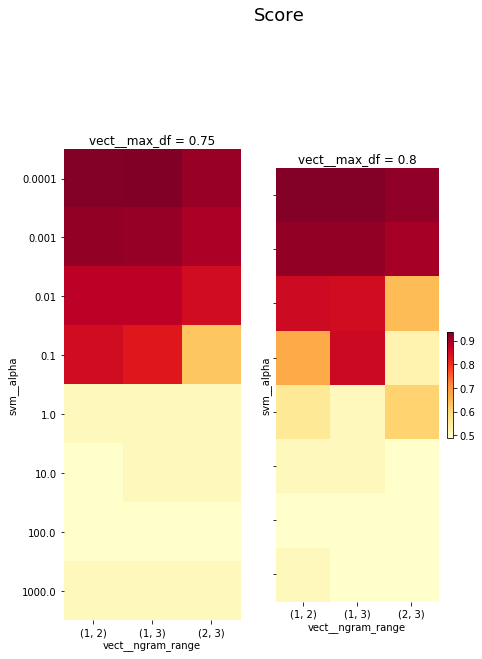

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.75, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]) 0.9379912663755459


In [124]:
bestModel, bestScore, allModels, allScores = pf.bestFit(text_clf_tf, paramGrid, X_train, y_train, X_test, y_test, metric = accuracy_score)

print(bestModel, bestScore)

In [125]:
# optimised tfidf

op_tfidf_vect= TfidfVectorizer(stop_words=stop_words,token_pattern=r'\b[^\d\W]+\b',lowercase=False,max_df=0.75,ngram_range=(1,2))

In [126]:
# optimised svm and pipeline

op_model = SGDClassifier(alpha=0.0001,loss='hinge',penalty='l2')

op_text_clf_tf = Pipeline([('vect', op_tfidf_vect),
                         ('svm', op_model)])

In [127]:
# final cross validation

scores = cross_val_score(op_text_clf_tf, X_train, y_train, cv=10, scoring='accuracy')
print (scores.mean())

C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9228225057024583


In [128]:
# final fit

op_text_clf_tf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.75, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [129]:
# final predict

op_predict = op_text_clf_tf.predict(X_test)

In [130]:
# final accuracy

accuracy_score(op_predict,y_test)

0.9310043668122271

### Prediction

To make the final prediction, the only preprocessing step that we needed to carry out was the combination of the title and the text. The rest of it is done by the pipeline automatically

In [131]:
news_test['text'] = news_test['title'] + '. ' + news_test['text']

In [132]:
news_test = news_test.drop('title',axis=1)

In [133]:
final_predictions = pd.DataFrame(op_text_clf_tf.predict(news_test['text']))

In [134]:
final_predictions.shape

(2321, 1)

In [135]:
final_predictions.columns = ['label']
final_predictions.index = news_test['ID']

In [136]:
news_test.shape

(2321, 3)

In [137]:
final_predictions.to_csv(os.path.join(file_path,'predictions_edu_anup.csv'))